In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
import pandas as pd

In [9]:
train_size = 1
with open(f'../../cuke-bfm-all-camera-params/outs/output-5k-40-80pc-20e-landmark-background_output-40k-5-80pc-20e-landmark-background/seperate-all-losses-80-pc-20-exp-0.00001-lr-{train_size}-train-mse-loss-5-cam-params/output.pickle', 'rb') as f:
    all_data = pickle.load(f)

In [10]:
all_data.keys()

dict_keys(['train_val_loss', 'args', 'test_loss'])

In [11]:
loss_dict = all_data['train_val_loss']
loss_dict.keys()

dict_keys(['train', 'val'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


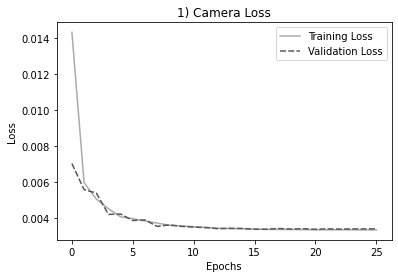

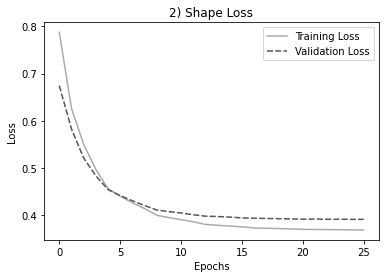

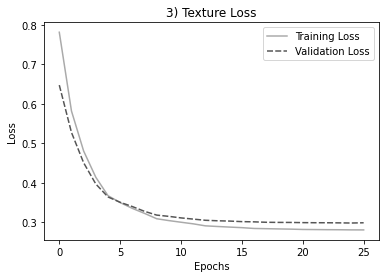

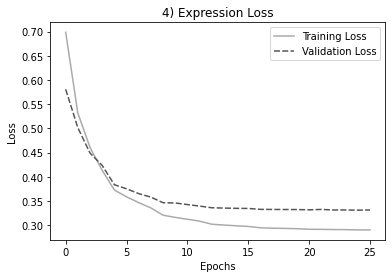

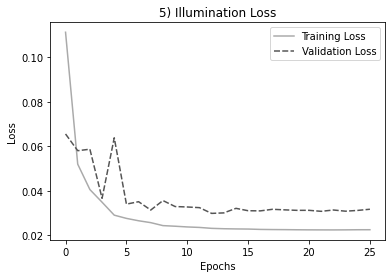

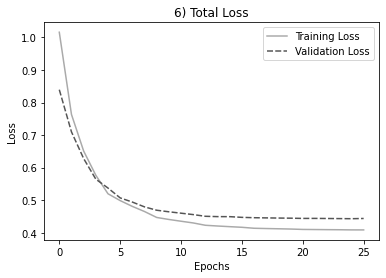

In [12]:
count = 1
for loss_type in ['camera_params', 'shape', 'texture', 'expression', 'shade', 'total']:
    loss = {'train': [], 'val': []}
    for phase in ['train', 'val']:
        for item in loss_dict[phase]:
            loss[phase].append(item[loss_type])
    plt.figure(figsize=(6, 4))
    data = pd.DataFrame(loss)
    sns.lineplot(data=data, palette='binary')
    loss_title = loss_type.title()
    if loss_type == 'camera_params': loss_title = 'Camera'
    if loss_type == 'shade': loss_title = 'Illumination'
    plt.title(f'{count}) {loss_title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.savefig(f'graphs/{"all"}-{loss_type}-loss-{train_size}-train.eps', bbox_inches='tight')
    count += 1

In [13]:
train_size = 1
with open(f'../../cuke-bfm-all-camera-params/outs/output-5k-40-80pc-20e-landmark-background_output-40k-5-80pc-20e-landmark-background/seperate-all-losses-80-pc-20-exp-0.00001-lr-{train_size}-train-mse-loss-5-cam-params/output.pickle', 'rb') as f:
    all_data = pickle.load(f)

In [14]:
all_data['test_loss']

{'theta': 0.0029248675327793517,
 'phi': 0.004389611071095624,
 'fov': 0.0023407346557907803,
 'pp': 0.0028636696039175636,
 'shape': 0.4287021113594927,
 'texture': 0.3118643123512742,
 'expression': 0.3370628243947257,
 'shading': 0.02571470925695571}

In [15]:
np.mean([all_data['test_loss']['theta'], all_data['test_loss']['phi'], all_data['test_loss']['fov'], all_data['test_loss']['pp']])

0.0031297207158958295